In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from face.utils import MetadataPostprocessor as MP

In [2]:
pwd

'/Users/mastropi/postdoc_works/topoface/code/topoface/notebooks/eda'

In [3]:
dataset = "CelebA"
metadata = pd.read_parquet(f"../../data/embeddings/{dataset}/df_dataset.parquet")
# metadata_identities = pd.read_parquet(f"../../embeddings/{dataset}/df_dataset_identities.parquet")
# metadata_attributes = pd.read_parquet(f"../../embeddings/{dataset}/df_dataset_attributes.parquet")

MODEL_NAMES = ["retina_facenet","retina_arcface"]
# MODEL_METRIC = ["euclidean", "cosine"]


embeddings = {}
for m, model_name in enumerate(MODEL_NAMES):
    data_npz = np.load(f"../../data/embeddings/{dataset}/embeddings_{model_name}.npz")
    embeddings[model_name] = data_npz['a']

In [4]:
# Column that tracks if the embeddings are to be kepts (good quality embeddings)
keep_meta = metadata.loc[metadata['keep_embeddings_retina_arcface']] # (facenet or  arcface, or custom)
metadata.head()

,file_basename,identity,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,path,retina_n_faces_detected,rgb_r,rgb_g,rgb_b,hsv_h,hsv_s,hsv_v,keep_embeddings_retina_facenet,keep_embeddings_retina_arcface
0,000001.jpg,2880,-1,1,1,-1,-1,-1,-1,-1,...,../../data/CelebA/CelebA/000001.jpg,1,186.621253,138.771205,111.080676,18.028938,121.680963,186.676020,True,True
1,000002.jpg,2937,-1,-1,-1,1,-1,-1,-1,1,...,../../data/CelebA/CelebA/000002.jpg,2,161.989636,139.883211,130.870695,29.131218,64.339365,164.508211,False,False
2,000003.jpg,8692,-1,-1,-1,-1,-1,-1,1,-1,...,../../data/CelebA/CelebA/000003.jpg,1,137.332430,122.143256,112.725367,40.700016,56.606665,141.362883,False,False
3,000004.jpg,5805,-1,-1,1,-1,-1,-1,-1,-1,...,../../data/CelebA/CelebA/000004.jpg,1,112.412707,80.612723,61.390545,13.296397,99.557318,112.458147,True,False
4,000006.jpg,4153,-1,1,1,-1,-1,-1,1,-1,...,../../data/CelebA/CelebA/000006.jpg,1,139.457908,105.007892,78.910953,14.698422,119.936623,139.499761,True,True


In [5]:
mp_obj = MP(metadata)


In [6]:
attribute_df, identity_df = mp_obj.get_metadataDataframes()

In [7]:
MODEL = 'arcface'
# Filtering out the bad face recognitions
mp_obj = MP(metadata.loc[metadata[f'keep_embeddings_retina_{MODEL}']])
attribute_keep_df, identity_keep_df = mp_obj.get_metadataDataframes()


In [8]:
attribute_keep_df.head()

,global_average,inter_entropy,intra_entropy
rgb_r,141.873690,NaN,NaN
rgb_g,108.721812,NaN,NaN
rgb_b,91.581976,NaN,NaN
hsv_h,27.608888,NaN,NaN
hsv_s,103.884345,NaN,NaN


In [9]:
identity_keep_df.head()

,mean_rgb_r,mean_rgb_g,mean_rgb_b,mean_hsv_h,mean_hsv_s,mean_hsv_v,size,entropy_5_o_Clock_Shadow,entropy_Arched_Eyebrows,entropy_Attractive,...,mean_Sideburns,mean_Smiling,mean_Straight_Hair,mean_Wavy_Hair,mean_Wearing_Earrings,mean_Wearing_Hat,mean_Wearing_Lipstick,mean_Wearing_Necklace,mean_Wearing_Necktie,mean_Young
identity,,,,,,,,,,,,,,,,,,,,,
14,163.844038,125.974888,103.586422,19.976667,101.677799,164.699614,26,0.645033,0.540204,0.617242,...,-0.923077,-0.076923,1.000000,-1.000000,-0.923077,-1.0,-1.000000,-0.846154,-0.923077,0.923077
17,113.807088,84.633860,76.681290,51.267681,110.925798,119.342950,28,0.154076,0.000000,0.000000,...,0.142857,-0.642857,-0.928571,-0.928571,-1.000000,0.5,-1.000000,-0.928571,-0.857143,-0.928571
21,156.229291,116.764181,96.456057,15.499811,103.030468,156.416782,27,0.348832,0.000000,0.529706,...,0.037037,0.185185,0.777778,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,0.037037,-0.555556
22,129.563979,102.265598,90.134300,23.478413,92.544099,130.758992,29,0.663725,0.552665,0.552665,...,-0.379310,-0.793103,-0.931034,0.241379,-1.000000,-1.0,-1.000000,-1.000000,-0.655172,0.931034
25,126.783221,94.659255,76.616476,23.912724,117.710341,127.361541,29,0.000000,0.644186,0.663725,...,-1.000000,-0.517241,-0.862069,-0.379310,-0.448276,-1.0,0.931034,-0.586207,-1.000000,0.793103


In [10]:
# The row corresponding to the first image (index 0) in the unfiltered metadata dataframe (file 000001.jpg)
embeddings['retina_arcface'][0, :]


array([ 9.99325156e-01,  1.98809040e+00, -7.61931658e-01, -4.46368083e-02,
        2.04201651e+00, -1.00439978e+00,  8.68415311e-02, -3.03302586e-01,
       -6.20745003e-01,  2.60928571e-02, -2.91761786e-01,  6.57780647e-01,
       -1.38720548e+00, -2.56968290e-01, -3.00609398e+00, -5.17119646e-01,
       -9.82442200e-01, -1.56816506e+00, -4.52592522e-01,  8.53536308e-01,
       -7.07060516e-01,  1.11915529e+00, -9.80938494e-01, -6.38127387e-01,
       -1.14533818e+00,  3.84594500e-01,  3.47055823e-01,  1.01979339e+00,
       -1.07785714e+00,  6.90953016e-01, -9.49244857e-01,  5.81787467e-01,
        3.33894062e+00, -1.94256687e+00, -2.85442382e-01,  1.23062491e+00,
        3.14147264e-01, -3.85346323e-01,  5.27011454e-01,  6.92419946e-01,
       -8.92482221e-01, -5.40223598e-01, -6.02197707e-01,  5.50130904e-01,
        7.34075248e-01,  1.06239903e+00, -4.56899464e-01, -1.13196403e-01,
        3.75625551e-01,  1.73077121e-01,  7.41975665e-01, -5.10497391e-01,
        1.37492275e+00,  

In [59]:
metadata.columns
cols_attributes = ['5_o_Clock_Shadow', 'Arched_Eyebrows',
       'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips',
       'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
       'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young']
cols_face = ['width', 'height', 'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y',
       'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x',
       'rightmouth_y']
cols_image = ['rgb_r', 'rgb_g', 'rgb_b', 'hsv_h', 'hsv_s', 'hsv_v']


In [12]:
identities_list = sorted(list(metadata['identity'].unique()))
identities_list

[14,
 15,
 17,
 21,
 22,
 23,
 25,
 31,
 32,
 38,
 47,
 56,
 59,
 65,
 66,
 69,
 78,
 82,
 85,
 94,
 95,
 114,
 122,
 142,
 147,
 160,
 171,
 192,
 199,
 209,
 220,
 234,
 235,
 248,
 273,
 284,
 289,
 291,
 295,
 301,
 303,
 305,
 313,
 318,
 334,
 343,
 348,
 349,
 353,
 363,
 365,
 371,
 394,
 395,
 397,
 403,
 404,
 409,
 417,
 433,
 447,
 449,
 467,
 468,
 481,
 487,
 492,
 494,
 495,
 496,
 499,
 510,
 516,
 534,
 539,
 545,
 553,
 562,
 565,
 567,
 600,
 614,
 632,
 649,
 650,
 659,
 661,
 665,
 676,
 679,
 719,
 735,
 742,
 800,
 801,
 844,
 861,
 871,
 873,
 894,
 918,
 924,
 951,
 953,
 958,
 971,
 973,
 975,
 977,
 978,
 981,
 985,
 986,
 987,
 988,
 991,
 992,
 993,
 997,
 1003,
 1008,
 1011,
 1014,
 1018,
 1023,
 1025,
 1027,
 1031,
 1032,
 1033,
 1034,
 1035,
 1037,
 1043,
 1044,
 1050,
 1051,
 1054,
 1059,
 1061,
 1062,
 1066,
 1088,
 1089,
 1090,
 1092,
 1103,
 1113,
 1120,
 1128,
 1135,
 1136,
 1137,
 1140,
 1149,
 1151,
 1153,
 1154,
 1164,
 1170,
 1175,
 1180,
 1181,

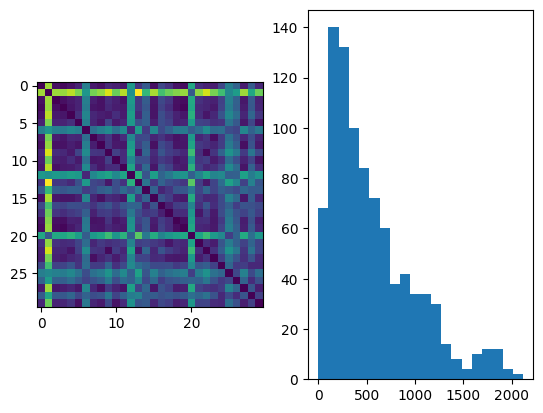

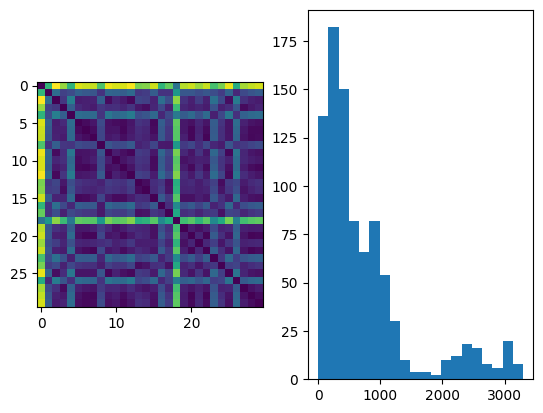

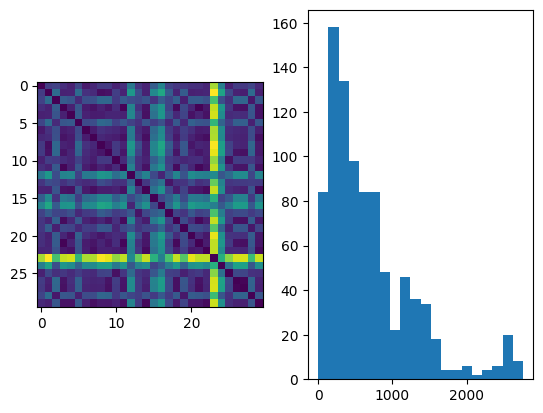

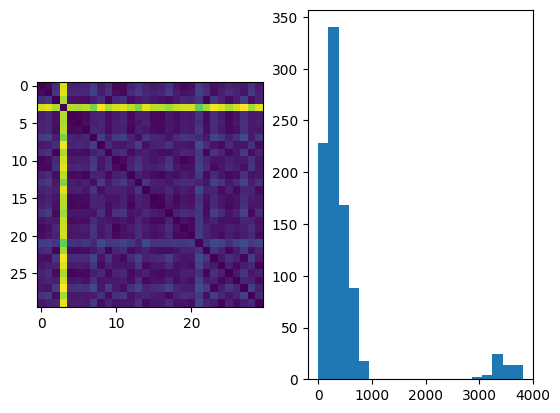

In [60]:
from sklearn.metrics import jaccard_score, hamming_loss, pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline
for i in identities_list[:4]:
    md = metadata[metadata['identity'] == i][cols_face]
    
    # dd = pairwise_distances(md, md, metric=hamming_loss)
    dd = pairwise_distances(md, md, metric='euclidean')
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(dd)
    ax[1].hist(dd.flatten(), bins=20)

In [14]:
CHOSEN_MODEL = 'retina_arcface'
embeddings[CHOSEN_MODEL]

array([[ 0.99932516,  1.9880904 , -0.76193166, ...,  0.15270123,
         0.24806494, -0.12573984],
       [-2.5548136 , -1.0336431 ,  0.601142  , ..., -2.0412362 ,
         0.09964452, -0.39285433],
       [ 0.49308774,  0.78925514,  0.05565099, ..., -0.31400815,
         0.06722995, -0.46764114],
       ...,
       [ 0.3817434 ,  1.3629814 ,  0.01653892, ..., -0.29483446,
         0.4468106 ,  0.40477183],
       [ 0.08420696,  1.5134448 , -0.8251546 , ..., -0.60460365,
         2.364725  ,  0.9662066 ],
       [ 1.2575833 ,  0.80089957,  1.2714387 , ...,  0.7241712 ,
         0.01701788, -1.130164  ]], dtype=float32)

In [17]:
import functools

submeta = metadata[functools.reduce(np.logical_or, list(metadata['identity']== i for i in identities_list[:4]))]

In [18]:
submeta = metadata[functools.reduce(np.logical_or, list(metadata['identity']== i for i in identities_list[:4]))]
embeddings[CHOSEN_MODEL][list(submeta.index)]

# metadata[np.logical_or(metadata['identity']== 14, metadata['identity'] == 15)]


array([[-0.47028178, -0.06186969,  0.5253245 , ..., -0.38565868,
        -0.42897627,  0.88335234],
       [ 0.759788  ,  0.32054868, -1.052738  , ..., -0.05039159,
         0.02749898,  0.6968664 ],
       [-1.0717455 , -0.4692738 ,  0.409092  , ..., -0.34736767,
        -0.98088926,  1.1845423 ],
       ...,
       [-1.9455682 , -1.2985823 , -0.29798618, ..., -0.6322953 ,
        -1.6495082 ,  0.14167699],
       [ 0.19562893, -1.0050215 , -1.391908  , ..., -0.45601422,
        -0.27838326, -0.04858592],
       [ 0.46609572,  0.0563347 ,  0.08775392, ..., -1.4603189 ,
        -0.00272454, -0.71251357]], dtype=float32)

In [80]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

from topo.support_functions import compute_plot_diagrams
import gtda
import plotly.tools as tls

figures_list = []
for ID in range(4):
    i = identities_list[ID]
    print(i)
    # Embeddings of identities

    # submeta = metadata[functools.reduce(np.logical_or, list(metadata['identity']== i for i in identities_list[ID:ID+1]))]
    submeta = metadata[metadata['identity'] == i]
    embs_data = embeddings[CHOSEN_MODEL][list(submeta.index)]
    p_diag, _ = compute_plot_diagrams([embs_data],
                                        metric='cosine',
                                       )
    fig_embs = gtda.plotting.plot_diagram(p_diag[0])
    
    # Distance matrix between attributes columns
    md = metadata[metadata['identity'] == i][cols_face]
    dd = pairwise_distances(md, md, metric='euclidean')
    p_diag, _ = compute_plot_diagrams([dd],
                                        metric='precomputed',
                                       )
    
    # Distance matrix between attributes columns

    md = metadata[metadata['identity'] == i][cols_image]
    dd = pairwise_distances(md, md, metric='euclidean')
    p_diag, _ = compute_plot_diagrams([dd],
                                        metric='precomputed',
                                       )
    fig_imag = gtda.plotting.plot_diagram(p_diag[0])
 
    # Save figures
    figures_list.append((fig_embs, fig_attr, fig_imag))
    


14
15
17
21


In [83]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

for fig_embs, fig_attr, fig_imag in figures_list:
    subplot = make_subplots(rows=1, cols=3)
    for scatter in fig_embs['data']:
        subplot.add_trace(scatter, row=1, col=1)
    for scatter in fig_attr['data']:
        subplot.add_trace(scatter, row=1, col=2)
    for scatter in fig_imag['data']:
        subplot.add_trace(scatter, row=1, col=3)
    # subplot.add_trace(f[1]['data'])
    # plotly.offline.iplot(f[0])
    # plotly.offline.iplot(f[1])
    plotly.offline.iplot(subplot)

In [27]:
p_diag.shape

(1, 158, 3)